In [80]:
import pandas as pd

from scipy.stats import shapiro
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Нам предоставлены данные с размерами раковин мидий, выращенных в двух российских городах - в Санкт-Петербурге и Магадане:

In [81]:
petersburg = [0.0974, 0.1352, 0.0817, 0.1016, 0.0968, 0.1064, 0.105]
magadan = [0.1033, 0.0915, 0.0781, 0.0685, 0.0677, 0.0697, 0.0764,
           0.0689]

Объединим исходные списки в единый DataFrame:

In [82]:
# преобразование в Series
petersburg = pd.Series(petersburg)
magadan = pd.Series(magadan)

data = pd.concat([petersburg, magadan], axis=1)
data.rename(columns={0: 'Petersburg', 1: 'Magadan'}, inplace=True)
data

,Petersburg,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,NaN,0.0689


Наши массивы изначально были разных размеров, поэтому в полученном датафрейме появился один пропуск. Во избежание искажения и потерь данных, заполним пропуск медианым значением и уравняем массивы данных:

In [83]:
median_value = data['Petersburg'].median()
data.fillna(median_value, inplace=True)
data

,Petersburg,Magadan
0,0.0974,0.1033
1,0.1352,0.0915
2,0.0817,0.0781
3,0.1016,0.0685
4,0.0968,0.0677
5,0.1064,0.0697
6,0.1050,0.0764
7,0.1016,0.0689


### Тест на нормальность

Для проверки нашего массива данных с помощью подходящего статистического теста сначала проверим данные на нормальность.

Для начала обозначим гипотезы и установим уровень значимости:

In [84]:
H0 = 'Данные распределены нормально'
Ha = 'Данные не распределены нормально (отвергаем нулевую гипотезу)'
alpha = 0.05

Для проверки выберем **теста Шапиро-Уилка**, поскольку данный тест показывает надежные результаты для выборок с небольшими размерами.

In [85]:
_, p = shapiro(data)
print('p=%.3f' % p)
print(('Данные не распределены нормально', 'Данные распределены нормально')[p > alpha])

p=0.101
Данные распределены нормально


Данные прошли проверку на нормальность, следовательно теперь мы можем приступить к исследованию связи между признаками с помощью **корреляции Пирсона**. Данный корреляционный тест подходит для данных с гауссовским распределением.

### Поиск корреляций

Проверим имеющиеся нормально распределенные данные на наличие связи с помощью **корреляции Пирсона**:

In [86]:
corr, p = pearsonr(data['Petersburg'], data['Magadan'])

if p > alpha:
    print("Нет значимой корреляции между двумя переменными (мы не можем отвергнуть нулевую гипотезу)")
else:
    print("Есть значимая разница между двумя переменными (отвергаем нулевую гипотезу)")

Нет значимой корреляции между двумя переменными (мы не можем отвергнуть нулевую гипотезу)


Проведем проверку полученного результата через визуализацию корреляции:

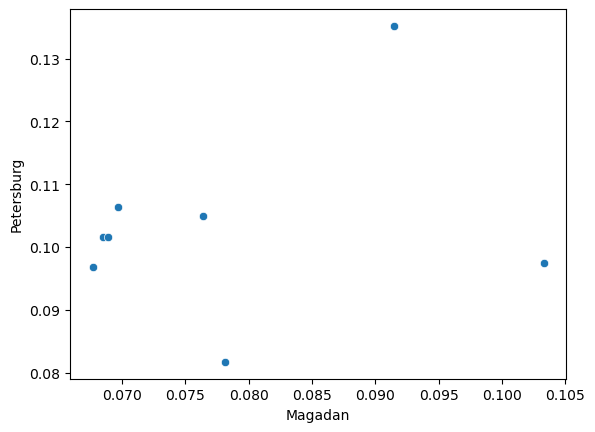

In [87]:
sns.scatterplot(data=data, x='Magadan', y='Petersburg');

**Вывод:** статистически значимая корреляция между двумя переменными отсутствует.

Для дальнейшей проверки гипотез нам подходит **параметрический статистический тест**. 

### Параметрический тест и проверка гипотез

**Задача:** выяснить, есть ли разница в среднем размере раковин мидий в зависимости от города-производителя.

В нашей задаче присутствуют две независимые совокупности - размеры мидий, выращенных в Санкт-Петербурге и Магадане. Зависимая переменная (размер раковины) является количественной, выборка небольшого размера, следовательно нам нужен тест на сравнение выборок, а именно **независимый T-тест**.

Выбор теста обусловлен следующим алгоритмом:


<left> <img src = https://lms.skillfactory.ru/assets/courseware/v1/69e3bc927ae293c1ad78ad4c1fe30ed4/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst-eda-4-10.png alt="drawing" style="width:800px;">

Уточним нулевую и альтернативную гипотезы для текущей задачи:

In [88]:
H0 = 'Нет разницы в среднем размере раковин мидий по двум городам'
Ha = 'Найдена разница в среднем размере раковин мидий по двум городам'

Теперь решим задачу с помощью соответствующего статистического теста.

In [89]:
def t_test(df):
    print('\n' + "*** Результаты независимого T-теста ***")
    test_results = ttest_ind(data['Petersburg'], data['Magadan'], equal_var=True)

    p = round(test_results[1],2)

    if p>alpha:
        print(f"{p} > {alpha}. Мы не можем отвергнуть нулевую гипотезу. {H0}")
    else:
        print(f"{p} <= {alpha}. Мы отвергаем нулевую гипотезу. {Ha}")

t_test(data)


*** Результаты независимого T-теста ***
0.0 <= 0.05. Мы отвергаем нулевую гипотезу. Найдена разница в среднем размере раковин мидий по двум городам


Таким образом, **мы обнаружили разницу в размерах раковин, выращиваемых в разных городах**. И действительно, у производителя морепродуктов из Санкт-Петербурга мидии больше, чем у соответствующего производителя из Магадана - при дальнейшем анализе это можно обнаружить:

In [90]:
difference = abs(data['Petersburg'].mean() - data['Magadan'].mean())
print(f'Разница между средним размером раковины мидии составляет: {difference:.3f}') 

Разница между средним размером раковины мидии составляет: 0.025


P-value равен нулю, разница вычислена. Альтернативная гипотеза подтверждена.